In [1]:
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cmocean import cm
#import colorcet as cc
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15

In [23]:
minoil = 3 # litres per grid cell

In [3]:
mesh = xr.open_dataset('~/Documents/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [4]:
data = xr.open_dataset('/home/sallen/Documents/MIDOSS/Visualization/Lagrangian_diesel-4_northern_strait_first30-4.nc')

In [24]:
oil = data.OilWaterColumnOilVol_3D[:, 39] > minoil/1000.

In [31]:
myoil1 = data.OilWaterColumnOilVol_3D[23::24, :].sum(axis=1)

In [32]:
myoil = myoil1 > minoil/1000.

In [33]:
oil_array = np.ma.masked_array(myoil, myoil < 0.001)

In [18]:
oil.shape

(168, 896, 396)

In [7]:
imin = 500
jmin = 100
imax = 770
jmax = 340

In [25]:
default = 240
oil_arrival = default * np.ones((896, 396))
for ii in range(imin, imax):
    if (int(ii/10)*10 == ii):
        print (ii)
    for jj in range(jmin, jmax):
        oil_arrival[ii, jj] = next((it for it, x in enumerate(oil[:, ii, jj]) if x), default)

        

500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760


In [26]:
print (oil_arrival.max()/24)

10.0


In [27]:
arrived = np.ma.masked_array(oil_arrival/24., oil_arrival/24. >= 10)


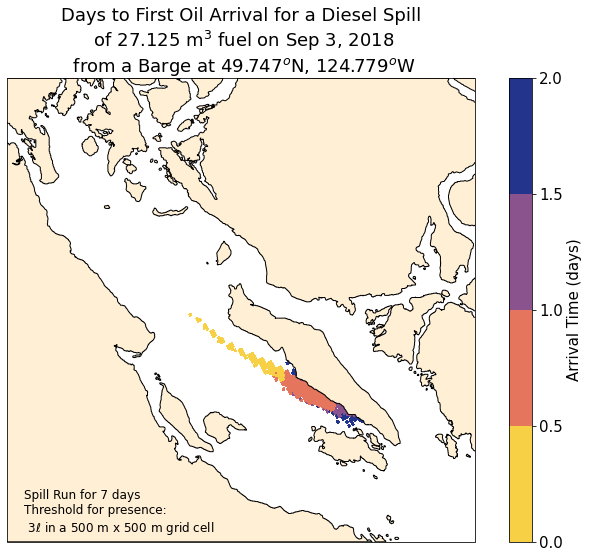

In [53]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)

bounds = np.arange(0, 2.5, 0.5)
norm = colors.BoundaryNorm(bounds, thermal_r_t.N)
C = ax.pcolormesh(
    mesh.nav_lon[1:, 1:], mesh.nav_lat[1:, 1:], arrived, 
    transform=crs.PlateCarree(), cmap=thermal_r_t, norm=norm
)
cb = fig.colorbar(C, ax=ax);
cb.set_label('Arrival Time (days)')
ax.set_title("Days to First Oil Arrival for a Diesel Spill\n of 27.125 m$^3$ fuel on Sep 3, 2018\n from a Barge at 49.747$^o$N, 124.779$^o$W");
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax.text(-125.25, 49.32, f'Spill Run for 7 days\nThreshold for presence:\n {minoil}$\ell$ in a 500 m x 500 m grid cell',
       transform=crs.PlateCarree(), fontsize=12)
fig.tight_layout()
fig.savefig(f'SingleSpill_latlon_{minoil}.png', dpi=200)

In [12]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = colors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [42]:
minColor = 0.1
maxColor = 0.85
thermal_r_t = truncate_colormap(cm.thermal_r, minColor, maxColor)
mydiscrete = truncate_colormap(cm.thermal_r, 0.1, 0.85, 4)
#thermal_r_t.set_bad('k')

7
5


/home/sallen/conda-envs/py39/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


3
1


/home/sallen/conda-envs/py39/lib/python3.9/site-packages/shapefile.py:391: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


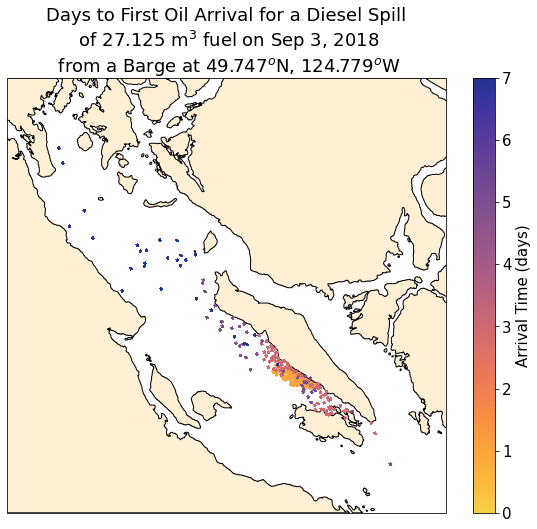

In [13]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)

for day in [7, 5, 3, 1]:
    print (day)
    C = ax.pcolormesh(
    mesh.nav_lon[1:-1, 1:-1], mesh.nav_lat[1:-1, 1:-1], day*oil_array[day-1], vmin=0, vmax=7,
    transform=crs.PlateCarree(), zorder=day, cmap=thermal_r_t
)
#C = ax.pcolormesh(
#    mesh.nav_lon[1:, 1:], mesh.nav_lat[1:, 1:], arrived, vmin=0, vmax=7,
#    transform=crs.PlateCarree(), cmap=thermal_r_t
#)
cb = fig.colorbar(C, ax=ax);
cb.set_label('Arrival Time (days)')
ax.set_title("Days to First Oil Arrival for a Diesel Spill\n of 27.125 m$^3$ fuel on Sep 3, 2018\n from a Barge at 49.747$^o$N, 124.779$^o$W");
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
fig.savefig('SingleSpill_latlon.png')

In [34]:
for day in range(7, 0, -1):
    slot = day - 1
    print (day, oil_array[slot][oil_array[slot] == 1].count())

7 0
6 0
5 1
4 1
3 2
2 36
1 85
